# **Maratona de Dados Falqon - Machine Learning**


---

> ## *Forecasting Google*





## Dependências




In [4]:
!pip install sklearn

## Bibliotecas


Math:
>https://docs.python.org/3/library/math.html

NumPy:
>https://numpy.org/doc/stable/index.html

Pandas:
>https://pandas.pydata.org/

In [5]:
import math
import numpy as np
import pandas as pd

# Tratando os Dados



## Dados utilizados



In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = pd.read_csv('/content/drive/My Drive/datasets/GOOGLE.csv', sep=';', index_col='Date', parse_dates=True)

In [8]:
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]

In [9]:
df.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0


In [10]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0

In [11]:
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

In [12]:
df.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,HL_PCT,PCT_change
Date,,,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0,8.072956,0.324968
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0,7.921706,7.227007
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0,4.049360,-1.227880
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0,7.657099,-5.726357
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0,3.886792,1.183658


In [13]:
df = df[['HL_PCT', 'PCT_change', 'Adj. Close', 'Adj. Volume']]
df.head()

,HL_PCT,PCT_change,Adj. Close,Adj. Volume
Date,,,,
2004-08-19,8.072956,0.324968,50.322842,44659000.0
2004-08-20,7.921706,7.227007,54.322689,22834300.0
2004-08-23,4.049360,-1.227880,54.869377,18256100.0
2004-08-24,7.657099,-5.726357,52.597363,15247300.0
2004-08-25,3.886792,1.183658,53.164113,9188600.0


In [14]:
forecast_col = 'Adj. Close'
forecast_col

'Adj. Close'

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3424 entries, 2004-08-19 to 2018-03-27
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HL_PCT       3424 non-null   float64
 1   PCT_change   3424 non-null   float64
 2   Adj. Close   3424 non-null   float64
 3   Adj. Volume  3424 non-null   float64
dtypes: float64(4)
memory usage: 133.8 KB


In [16]:
df.fillna(value=-99999, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [17]:
forecast_out = int(math.ceil(0.01 * len(df)))
forecast_out

35

In [18]:
df['label'] = df[forecast_col].shift(-forecast_out)

In [19]:
df.head(37)

,HL_PCT,PCT_change,Adj. Close,Adj. Volume,label
Date,,,,,
2004-08-19,8.072956,0.324968,50.322842,44659000.0,69.078238
2004-08-20,7.921706,7.227007,54.322689,22834300.0,67.839414
2004-08-23,4.049360,-1.227880,54.869377,18256100.0,68.912727
2004-08-24,7.657099,-5.726357,52.597363,15247300.0,70.668146
2004-08-25,3.886792,1.183658,53.164113,9188600.0,71.219849
2004-08-26,3.048837,2.820391,54.122070,7094800.0,72.278116
2004-08-27,2.760245,-1.803885,53.239345,6211700.0,74.810934
2004-08-30,3.411430,-3.106003,51.162935,5196700.0,74.199045
2004-08-31,1.514115,0.048866,51.343492,4917800.0,70.462511


# Treinamento

## Dependências


A scikit-learn é uma biblioteca de ML para Python. Ela inclui vários algoritmos de classificação, regressão e agrupamento incluindo máquinas de vetores de suporte, florestas aleatórias, gradient boosting, k-means e DBSCAN, e é projetada para interagir com as bibliotecas NumPy e SciPy.


Model selection:
> https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

SVR:
> https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

Linear Regression:


> https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html




In [20]:
from sklearn import model_selection, svm
from sklearn.linear_model import LinearRegression

## Preparando pra testes e treinamento

In [21]:
X= np.array(df.drop(['label'],1))
X

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


array([[ 8.07295560e+00,  3.24967503e-01,  5.03228418e+01,
         4.46590000e+07],
       [ 7.92170621e+00,  7.22700723e+00,  5.43226889e+01,
         2.28343000e+07],
       [ 4.04936015e+00, -1.22788010e+00,  5.48693765e+01,
         1.82561000e+07],
       ...,
       [ 4.08260679e+00, -2.36072933e+00,  1.02655000e+03,
         2.41351700e+06],
       [ 4.61915017e+00,  3.32191129e-01,  1.05409000e+03,
         3.27240900e+06],
       [ 6.64587761e+00, -5.35388664e+00,  1.00694000e+03,
         2.94095700e+06]])

In [22]:
X_lately = X[-forecast_out:]
X_lately

array([[ 5.29033686e+00,  4.87920463e+00,  1.08443000e+03,
         3.73252700e+06],
       [ 3.02346955e+00, -2.72449929e+00,  1.05541000e+03,
         2.54468300e+06],
       [ 5.84824980e+00, -5.12043930e+00,  1.00560000e+03,
         3.06717300e+06],
       [ 5.24424255e+00,  1.71072640e+00,  1.04343000e+03,
         4.43603200e+06],
       [ 1.90411167e+00, -1.99683913e-01,  1.05456000e+03,
         2.79625800e+06],
       [ 1.35655606e+00,  3.94285714e-01,  1.05414000e+03,
         1.57412100e+06],
       [ 2.39302694e+00,  1.74330374e+00,  1.07270000e+03,
         2.02997900e+06],
       [ 2.46206568e+00,  7.30075223e-01,  1.09136000e+03,
         1.80620600e+06],
       [ 1.52989503e+00,  1.93894163e-01,  1.09550000e+03,
         1.97192800e+06],
       [ 2.38222528e+00,  9.91068487e-01,  1.10359000e+03,
         1.64640500e+06],
       [ 2.57598204e+00,  4.19258859e-01,  1.11375000e+03,
         2.02453400e+06],
       [ 1.82989459e+00, -8.28292395e-01,  1.10990000e+03,
      

In [23]:
X = X[:- forecast_out:]
X

array([[ 8.07295560e+00,  3.24967503e-01,  5.03228418e+01,
         4.46590000e+07],
       [ 7.92170621e+00,  7.22700723e+00,  5.43226889e+01,
         2.28343000e+07],
       [ 4.04936015e+00, -1.22788010e+00,  5.48693765e+01,
         1.82561000e+07],
       ...,
       [ 1.53098791e+00,  4.76194525e-01,  1.18159000e+03,
         2.77496700e+06],
       [ 1.79860615e+00, -7.29098295e-01,  1.11920000e+03,
         5.79888000e+06],
       [ 5.45024140e+00, -2.89384977e+00,  1.06876000e+03,
         3.74246900e+06]])

In [24]:
df.dropna(inplace=True)

In [25]:
y = np.array(df['label'])
y

array([  69.0782379 ,   67.83941377,   68.91272699, ..., 1026.55      ,
       1054.09      , 1006.94      ])

In [26]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

In [27]:
X_train

array([[ 1.61437065e+00, -8.12172088e-01,  2.37046741e+02,
         9.74860000e+06],
       [ 1.53420204e+00, -3.39214743e-01,  1.97454523e+02,
         4.85050000e+06],
       [ 8.31278339e-01, -5.02592109e-01,  2.52198513e+02,
         9.23310000e+06],
       ...,
       [ 2.36506018e+00, -1.85691443e+00,  5.70810000e+02,
         2.41345300e+06],
       [ 1.36448598e+00, -7.42115028e-01,  5.35000000e+02,
         1.64527600e+06],
       [ 3.35962232e+00, -2.06272401e+00,  2.74091093e+02,
         9.83310000e+06]])

## SVR

Definimos o algoritmo

In [28]:
clf = svm.SVR()
clf

SVR()

Treinamos o mesmo

In [29]:
clf.fit(X_train, y_train)

SVR()

## Linear Regression

In [30]:
clf2 = LinearRegression()
clf2

LinearRegression()

In [31]:
clf2.fit(X_train, y_train)

LinearRegression()

# Testando

## SVR

In [32]:
accuracy_SVR = clf.score(X_test, y_test)
accuracy_SVR

0.5069330033483055

## Linear Regression

In [33]:
accuracy_LR = clf2.score(X_test, y_test)
accuracy_LR

0.9792166908308786

# Predict

In [34]:
predicao_set = clf2.predict(X_lately)
predicao_set

array([1103.07018831, 1072.70221266, 1019.20741215, 1060.15796245,
       1073.61258777, 1074.27774807, 1092.64999278, 1111.09019039,
       1115.65982637, 1123.6558839 , 1133.39244384, 1129.76228433,
       1148.87259169, 1164.99505471, 1136.12134137, 1122.72964593,
       1087.68748849, 1103.59867901, 1114.86550176, 1121.65168114,
       1135.70042916, 1150.58328859, 1181.6969616 , 1186.55369206,
       1157.55220064, 1169.55458443, 1170.77317695, 1153.33459182,
       1118.23377317, 1115.09404209, 1113.79854424, 1070.03418306,
       1043.01169144, 1071.21910711, 1019.93086396])

# Exibindo dados

## Dependências

Matplotlib é uma biblioteca de plotagem para a linguagem de programação Python e sua extensão numérica de matemática NumPy


> https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html?highlight=pyplot#module-matplotlib.pyplot



In [35]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style

Estilos de plotagem: 

> https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html




In [36]:
style.use('ggplot')

## Inserindo as predições

In [37]:
df['forecast'] = np.nan
df.head()

,HL_PCT,PCT_change,Adj. Close,Adj. Volume,label,forecast
Date,,,,,,
2004-08-19,8.072956,0.324968,50.322842,44659000.0,69.078238,NaN
2004-08-20,7.921706,7.227007,54.322689,22834300.0,67.839414,NaN
2004-08-23,4.049360,-1.227880,54.869377,18256100.0,68.912727,NaN
2004-08-24,7.657099,-5.726357,52.597363,15247300.0,70.668146,NaN
2004-08-25,3.886792,1.183658,53.164113,9188600.0,71.219849,NaN


In [38]:
last_date = df.iloc[-1].name
last_date

Timestamp('2018-02-05 00:00:00')

In [39]:
last_unix = last_date.timestamp()
last_unix

1517788800.0

In [40]:
next_unix = last_unix + 86400

In [41]:
datetime.datetime.fromtimestamp(next_unix)

datetime.datetime(2018, 2, 6, 0, 0)

In [42]:
for i in predicao_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan, np.nan, np.nan, np.nan, np.nan] + [i]

In [43]:
df

,HL_PCT,PCT_change,Adj. Close,Adj. Volume,label,forecast
Date,,,,,,
2004-08-19,8.072956,0.324968,50.322842,44659000.0,69.078238,NaN
2004-08-20,7.921706,7.227007,54.322689,22834300.0,67.839414,NaN
2004-08-23,4.049360,-1.227880,54.869377,18256100.0,68.912727,NaN
2004-08-24,7.657099,-5.726357,52.597363,15247300.0,70.668146,NaN
2004-08-25,3.886792,1.183658,53.164113,9188600.0,71.219849,NaN
...,...,...,...,...,...,...
2018-03-08,NaN,NaN,NaN,NaN,NaN,1113.798544
2018-03-09,NaN,NaN,NaN,NaN,NaN,1070.034183
2018-03-10,NaN,NaN,NaN,NaN,NaN,1043.011691


## Plotando

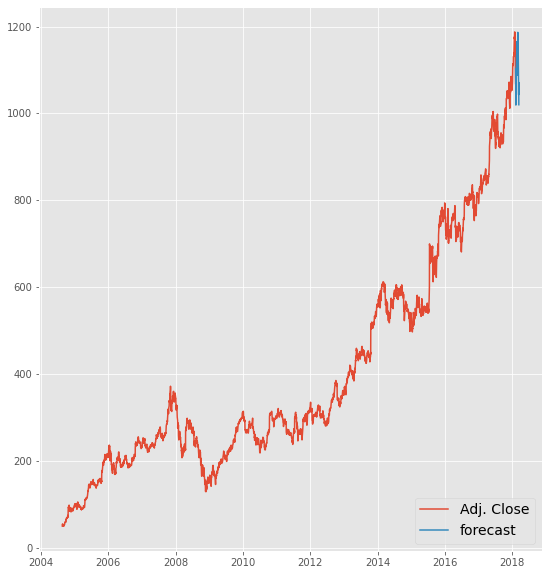

In [73]:
plt.figure(figsize=(9,10))
plt.plot(df[['Adj. Close','forecast']])
plt.legend((df[['Adj. Close','forecast']]),fontsize=14, loc=4);